<a href="https://colab.research.google.com/github/JeongeunL/Boostcourse/blob/main/4_Feature_engineering_with_Diabetes_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 강좌 보기 : https://www.edwith.org/boostcourse-ds-511

<img src="https://upload.wikimedia.org/wikipedia/commons/6/6f/Pima.jpg" width=200>

* [Pima people - Wikipedia](https://en.wikipedia.org/wiki/Pima_people)

## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

### 1. 필요한 라이브러리 로드

In [248]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 2. 데이터셋 불러오기

In [249]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [250]:
PATH = "/content/drive/MyDrive/Colab Notebooks/부스트코스/data/"
df = pd.read_csv(PATH + "diabetes.csv")

In [251]:
df.shape

(768, 9)

In [252]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [253]:
df.info() # 결측치 없고, 모두 숫자 데이터 --> 이 데이터는 전처리 필요 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### *수치형 변수를 범주형 변수로 만들기

수치형 변수의 범위가 넓으면 tree의 깊이가 깊어져 overfitting을 유발할 수 있다. <br>
시각화한 결과를 바탕으로 feature engineering을 수행한다.

In [254]:
df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


In [255]:
# One-Hot-Encoding
# (보통 범주형->수치형으로 바꿀 때 사용)
# 여기에서는 수치형->범주형->수치형
df["Age_low"] = df["Age"] < 30
df["Age_middle"] = (df["Age"] >= 30) & (df["Age"] <= 60) # 조건은 소괄호로 묶어줘야 함 (연산 우선순위 오류 방지)
df["Age_high"] = df["Age"] > 60
df[["Age", "Age_low", "Age_middle", "Age_high"]].head()

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False


<Axes: xlabel='Age_high', ylabel='count'>

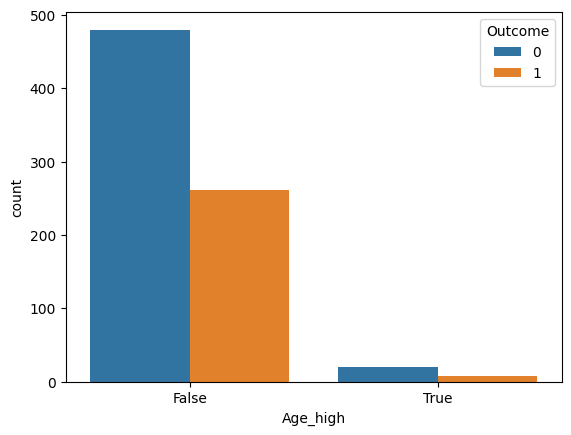

In [256]:
sns.countplot(data=df, x="Age_high", hue="Outcome")

### *범주형 변수를 수치형 변수로 만들기

### *결측치 다루기 (결측치 대체, 로그변환)

In [257]:
df.isnull().sum() # 결측치가 없는 것처럼 보임

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies_high            0
Age_low                     0
Age_middle                  0
Age_high                    0
dtype: int64

In [258]:
df.describe() # 하지만 데이터 요약을 보면, 결측치가 있다
# Glucose, BloodPressure, SkinThickness, Insulin, BMI 등...

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [259]:
df["Insulin_nan"] = df["Insulin"].replace(0, np.nan)
df[["Insulin", "Insulin_nan"]]

,Insulin,Insulin_nan
0,0,NaN
1,0,NaN
2,0,NaN
3,94,94.0
4,168,168.0
...,...,...
763,180,180.0
764,0,NaN
765,112,112.0
766,0,NaN


In [260]:
df["Insulin_nan"].isnull().sum() # Insulin의 결측치 개수

374

In [261]:
df["Insulin_nan"].isnull().mean() # Insulin의 결측치 비율

0.4869791666666667

In [262]:
df.groupby(["Outcome"])["Insulin", "Insulin_nan"].mean()
# 인슐린 결측치 처리를 안 했을 때와 했을 때의 평균 인슐린 수치의 차이가 많이 난다.

<ipython-input-262-5a6fad439d48>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Outcome"])["Insulin", "Insulin_nan"].mean()


,Insulin,Insulin_nan
Outcome,,
0,68.792000,130.287879
1,100.335821,206.846154


In [263]:
df.groupby(["Outcome"])["Insulin", "Insulin_nan"].agg(["mean", "median"])

<ipython-input-263-bea675cdc2dc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Outcome"])["Insulin", "Insulin_nan"].agg(["mean", "median"])


Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000   39.0  130.287879  102.5
1        100.335821    0.0  206.846154  169.5

In [264]:
# 결측치 채우기

# Insulin이 결측치인 데이터만 불러옴
df.loc[(df["Outcome"]==0) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 102.5
df.loc[(df["Outcome"]==1) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 169.5
# 130, 206: Insulin의 결측치를 제외한 데이터들의 Insulin 평균

print(df.loc[df["Outcome"]==0, "Insulin_nan"])
print(df.loc[df["Outcome"]==1, "Insulin_nan"])

# +) Insulin의 결측치를 연령대별 Insulin 중앙값으로 대체하면 더 좋은 결과가 나올 수도?

1      102.5
3       94.0
5      102.5
7      102.5
10     102.5
       ...  
762    102.5
763    180.0
764    102.5
765    112.0
767    102.5
Name: Insulin_nan, Length: 500, dtype: float64
0      169.5
2      169.5
4      168.0
6       88.0
8      543.0
       ...  
755    110.0
757    169.5
759    169.5
761    169.5
766    169.5
Name: Insulin_nan, Length: 268, dtype: float64


<ipython-input-265-09d4c67f6f3f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Insulin"])


<Axes: xlabel='Insulin', ylabel='Density'>

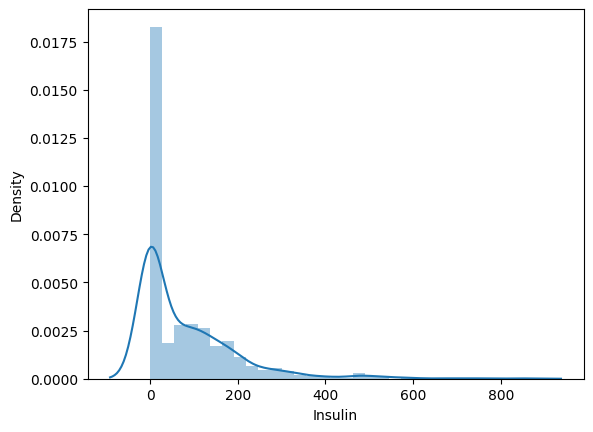

In [265]:
sns.distplot(df["Insulin"])
# 이렇게 데이터가 치우쳐 있으면 학습이 정확하지 않을 수 있다.

<ipython-input-266-41d58135f48c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df["Insulin"] > 0, "Insulin"])


<Axes: xlabel='Insulin', ylabel='Density'>

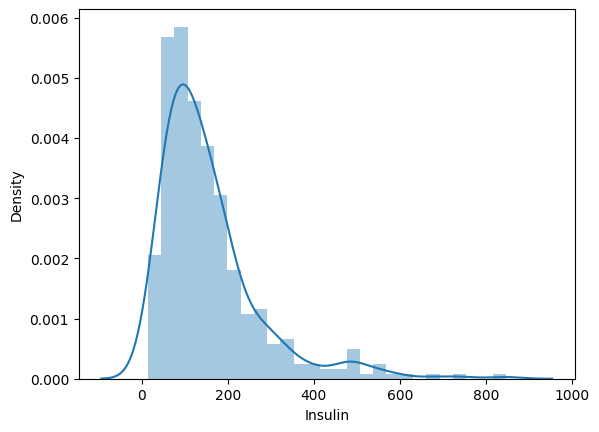

In [266]:
sns.distplot(df.loc[df["Insulin"] > 0, "Insulin"])
# Insulin의 결측치를 제외하고 히스토그램을 그렸더니,
# 왜도가 완화되었지만 그래도 여전히 치우쳐져 있다.

# 왜도: 치우쳐진 정도 / 첨도: 뾰족한 정도

<ipython-input-267-c57d1ecd1038>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df.loc[df["Insulin"] > 0, "Insulin"] + 1))


<Axes: xlabel='Insulin', ylabel='Density'>

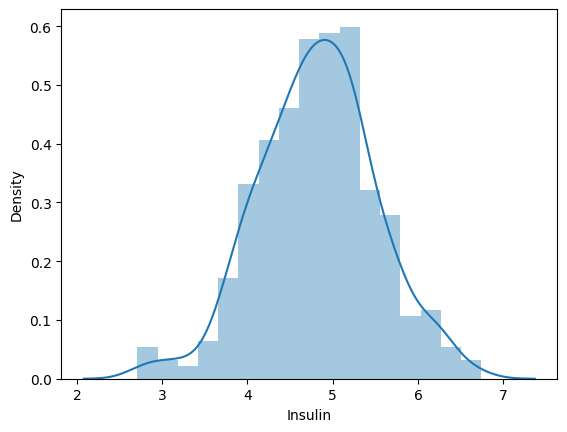

In [267]:
# 로그변환 -> 데이터가 정규분포에 가까운 모양을 띄게 되었다.
# 머신러닝은 데이터가 정규분포를 따를 때 학습을 더 잘 한다.

sns.distplot(np.log(df.loc[df["Insulin"] > 0, "Insulin"] + 1))
# 로그변환을 할 때 1을 더해 주는 이유: 0 이하에서는 마이너스 값으로 수렴하기 때문

<ipython-input-268-c5d62e32026a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Insulin_nan"])


<Axes: xlabel='Insulin_nan', ylabel='Density'>

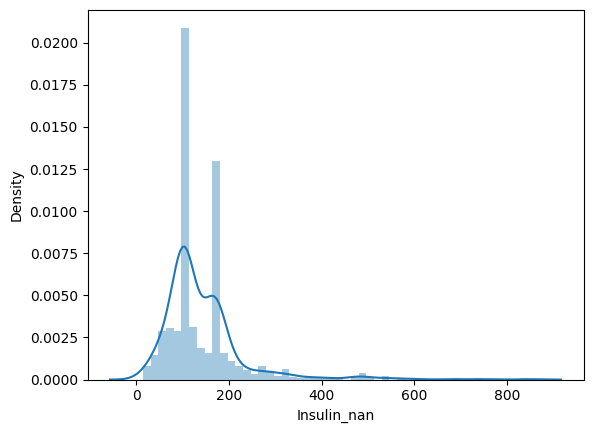

In [268]:
sns.distplot(df["Insulin_nan"])
# 이건 결측치를 대체한 Insulin의 분포인데,
# 여전히 왼쪽으로 치우쳐진 모양이다.

<ipython-input-269-2d16a40025e1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Insulin_log"])


<Axes: xlabel='Insulin_log', ylabel='Density'>

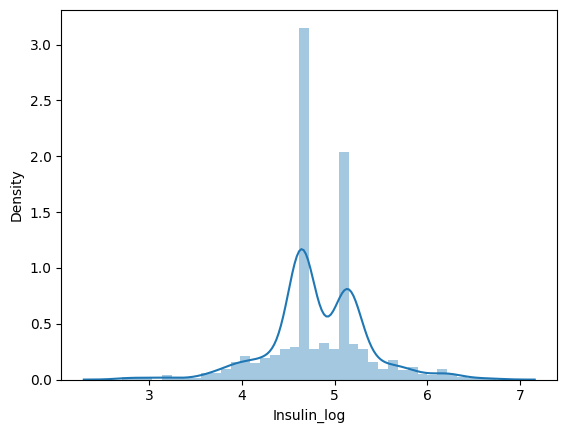

In [269]:
df["Insulin_log"] = np.log(df["Insulin_nan"] + 1)
sns.distplot(df["Insulin_log"])

# 결측치를 인위적으로 채워주었기 때문에 두 개의 뾰족한 값이 보인다
# 하지만 로그변환을 하여 치우친 정도를 줄여주었다 (히스토그램이 가운데로 이동)

### *상관분석을 통한 파생변수 만들기

pairplot과 lmplot을 통해 Insulin과 Glucose의 관계를 확인하였다.

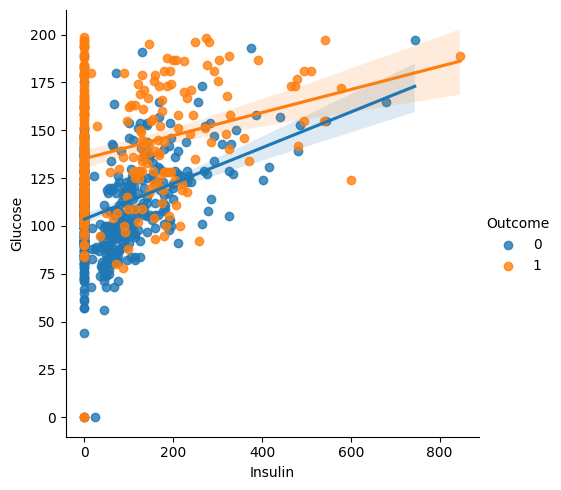

In [270]:
sns.lmplot(data=df, x="Insulin", y="Glucose", hue="Outcome")
# 그래프에서 일자인 값은 결측치를 채워준 값

In [271]:
df["low_glu_insulin"] = (df["Glucose"] < 100) & (df["Insulin_nan"] <= 102.5)
df["low_glu_insulin"].head()

# 기준을 100 언저리로 한 이유: 당뇨병에 걸리지 않은 데이터가 Insulin < 200 이하로
# 몰려 있기 때문

0    False
1     True
2    False
3     True
4    False
Name: low_glu_insulin, dtype: bool

In [272]:
pd.crosstab(df["Outcome"], df["low_glu_insulin"])
# outcome==0인 경우 글루코스&인슐린이 둘 다 낮은 데이터: 332개
# outcome==1인 경우 글루코스&인슐린이 둘 다 낮은 데이터: 5개

low_glu_insulin,False,True
Outcome,,
0,332,168
1,263,5


### *이상치 다루기

<Axes: xlabel='Insulin'>

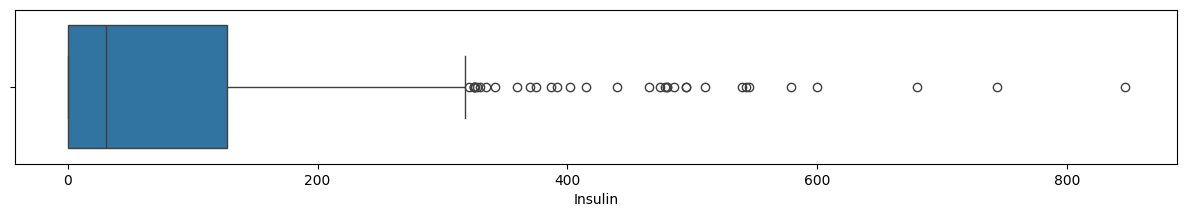

In [273]:
# 결측치 처리 전 Insulin
plt.figure(figsize=(15, 2))
sns.boxplot(x=df["Insulin"])

<Axes: xlabel='Insulin_nan'>

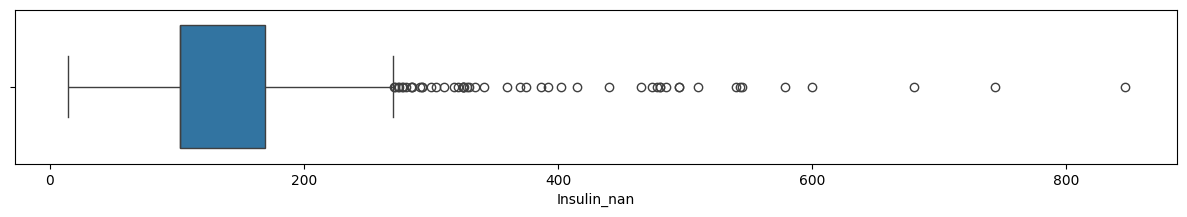

In [274]:
# 결측치 처리 후 Insulin
plt.figure(figsize=(15, 2))
sns.boxplot(x=df["Insulin_nan"])

# 이상치가 3개 정도 보인다.

In [275]:
df["Insulin_nan"].describe()

# 25% 값: 상자 몸통의 시작 값
# 여기서 25% 값과 50% 값이 같은 이유: 결측치를 평균(또는 중앙값)으로 채워줬었기 때문
# 50% 값에 비해 평균값이 높아 보인다
# 그리고 75% 값과 max 값이 크게 차이 난다

count    768.000000
mean     141.753906
std       89.100847
min       14.000000
25%      102.500000
50%      102.500000
75%      169.500000
max      846.000000
Name: Insulin_nan, dtype: float64

In [276]:
IQR3 = df["Insulin_nan"].quantile(0.75)
IQR1 = df["Insulin_nan"].quantile(0.25)
IQR = IQR3 - IQR1
IQR

67.0

In [277]:
# 이상치의 기준
OUT = IQR3 + (IQR * 1.5)
OUT

270.0

In [278]:
# 이상치의 개수
df[df["Insulin_nan"] > OUT].shape # -> 이상치가 51개

# -> 제거하기엔 데이터 수가 너무 많다고 판단

(51, 16)

In [279]:
# 대신 값이 600 이상인 값만 제거하기로
df[df["Insulin_nan"] > 600].shape # -> 이 경우엔 이상치가 3개

(3, 16)

V training dataset 나누기에서 계속

### *피쳐 스케일링

이 데이터셋에는 단위의 차이가 큰 컬럼은 없지만, 단위 차이가 크게 나는 경우 피쳐 스케일링을 전처리 과정에서 사용한다.

array([[<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Glucose'}>]], dtype=object)

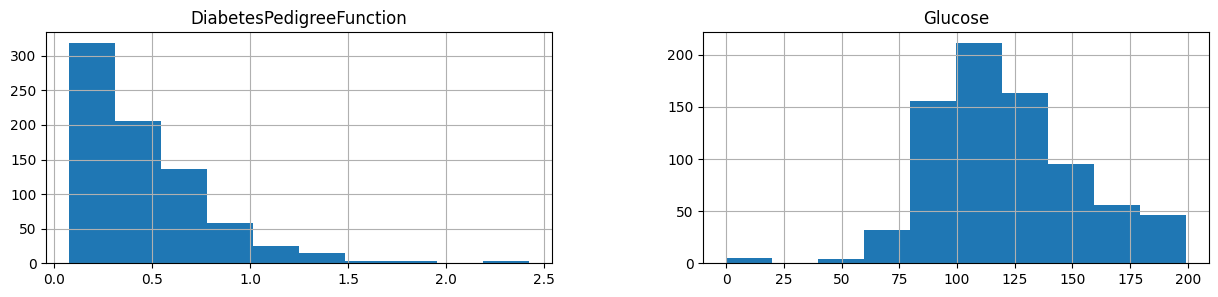

In [280]:
# 기존 히스토그램
df[["DiabetesPedigreeFunction", "Glucose"]].hist(figsize=(15, 3))

In [281]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


In [282]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[["DiabetesPedigreeFunction", "Glucose"]])
scale = scaler.transform(df[["DiabetesPedigreeFunction", "Glucose"]])
scale

array([[ 0.46849198,  0.84832379],
       [-0.36506078, -1.12339636],
       [ 0.60439732,  1.94372388],
       ...,
       [-0.68519336,  0.00330087],
       [-0.37110101,  0.1597866 ],
       [-0.47378505, -0.8730192 ]])

In [283]:
df[["DiabetesPedigreeFunction", "Glucose"]] = scale # 각 컬럼에 scale한 값을 적용 (= 순서 주의)
df[["DiabetesPedigreeFunction", "Glucose"]].head()

,DiabetesPedigreeFunction,Glucose
0,0.468492,0.848324
1,-0.365061,-1.123396
2,0.604397,1.943724
3,-0.920763,-0.998208
4,5.484909,0.504055


array([[<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Glucose'}>]], dtype=object)

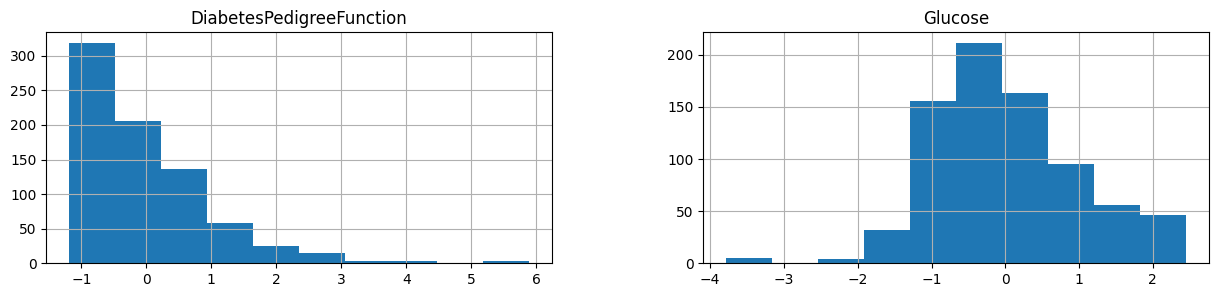

In [284]:
df[["DiabetesPedigreeFunction", "Glucose"]].hist(figsize=(15, 3))

# scaling의 차이가 줄어들었다. (x축의 단위가 달라졌다)

### --CSV 파일 형식으로 전처리한 데이터 저장하기--

In [285]:
#df.to_csv("/content/drive/MyDrive/Colab Notebooks/부스트코스/data/diabetes_feature.csv",
#         index=False)

In [286]:
#pd.read_csv("/content/drive/MyDrive/Colab Notebooks/부스트코스/data/diabetes_feature.csv").head()

In [287]:
# ^전처리한 데이터 (피쳐 스케일링은 제외함)

### 3. 학습, 예측 데이터셋 나누기

In [288]:
df.shape # 전체 데이터는 768개 행

(768, 16)

In [289]:
int(df.shape[0] * 0.8) # 전체 데이터의 80% 위치에 해당하는 인덱스 값

614

> training dataset 나누기



In [290]:
split_count = int(df.shape[0] * 0.8)
split_count

614

In [291]:
train = df[:split_count].copy() # training data
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,0.848324,72,35,0,33.6,0.468492,50,1,False,False,True,False,169.5,5.138735,False
1,1,-1.123396,66,29,0,26.6,-0.365061,31,0,False,False,True,False,102.5,4.639572,True
2,8,1.943724,64,0,0,23.3,0.604397,32,1,True,False,True,False,169.5,5.138735,False
3,1,-0.998208,66,23,94,28.1,-0.920763,21,0,False,True,False,False,94.0,4.553877,True
4,0,0.504055,40,35,168,43.1,5.484909,33,1,False,False,True,False,168.0,5.129899,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,-0.309671,62,13,182,24.0,-1.008346,23,0,False,True,False,False,182.0,5.209486,False
610,3,-0.466156,54,21,158,30.9,-0.543248,24,0,False,True,False,False,158.0,5.068904,False
611,3,1.662050,58,22,194,32.9,0.365808,36,1,False,False,True,False,194.0,5.273000,False
612,7,1.474267,88,42,321,38.2,0.951711,40,1,True,False,True,False,321.0,5.774552,False


In [292]:
train.shape

(614, 16)

이상치는 train 데이터에서만 제거한다. test 데이터는 미래의 데이터로 간주하는데, 미래의 데이터는 우리가 이상치를 직접 조절해볼 수 없기 때문이다.

In [293]:
train[train["Insulin_nan"] > 600]
# 이상치들이 모두 train 데이터에 들어 있었다.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
13,1,2.131507,60,23,846,30.1,-0.223115,59,1,False,False,True,False,846.0,6.741701,False
228,4,2.381884,70,39,744,36.7,5.608734,31,0,False,False,True,False,744.0,6.613384,False
247,0,1.380375,90,33,680,52.3,-0.135532,23,0,False,True,False,False,680.0,6.523562,False


In [294]:
train = train[train["Insulin"] < 600]
train.shape # 이상치를 제외한 후 데이터 개수

(610, 16)

> test dataset 나누기


In [295]:
test = df[split_count:].copy()
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
614,11,0.535352,74,26,144,36.1,0.257084,50,1,True,False,True,False,144.0,4.976734,False
615,3,-0.466156,72,0,0,25.8,-0.799958,27,0,False,True,False,False,102.5,4.639572,False
616,6,-0.121888,96,0,0,28.7,-0.950964,30,0,False,False,True,False,102.5,4.639572,False
617,2,-1.655448,62,13,15,20.1,-0.648952,23,0,False,True,False,False,15.0,2.772589,True
618,9,-0.278373,82,24,0,28.2,2.446670,50,1,True,False,True,False,169.5,5.138735,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,-0.622642,76,48,180,32.9,-0.908682,63,0,True,False,False,True,180.0,5.198497,False
764,2,0.034598,70,27,0,36.8,-0.398282,27,0,False,True,False,False,102.5,4.639572,False
765,5,0.003301,72,23,112,26.2,-0.685193,30,0,False,False,True,False,112.0,4.727388,False
766,1,0.159787,60,0,0,30.1,-0.371101,47,1,False,False,True,False,169.5,5.138735,False


In [296]:
test.shape

(154, 16)

### 4. 학습, 예측에 사용할 컬럼

In [297]:
train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [298]:
train.columns[:-1] # 'Outcome'컬럼을 제외한 모든 컬럼

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log'],
      dtype='object')

In [299]:
# feature_names라는 변수에 학습과 예측에 사용할 컬럼명 가져옴
feature_names = train.columns.tolist()
feature_names.remove("Pregnancies")
feature_names.remove("Outcome")
feature_names.remove("Age_low")
feature_names.remove("Age_middle")
feature_names.remove("Age_high")
feature_names.remove("Insulin")
feature_names.remove("Insulin_log")
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_nan',
 'low_glu_insulin']

### 5. 정답값이자 예측해야 될 값

In [300]:
# label_name이라는 변수에 예측할 컬럼의 이름을 가져옴
label_name = "Outcome"
label_name

'Outcome'

In [301]:
# Q. 왜 feature_names는 리스트 형태이고 label_name은 리스트가 아닌가?
# A. 이 데이터에서 예측할 값은 하나밖에 없기 때문

### 6. 학습, 예측 데이터셋 만들기

> training dataset 만들기

In [302]:
# 학습 세트 만들기 (ex) 기출문제)
X_train = train[feature_names]

In [303]:
# Q. 데이터를 랜덤하게 섞은 다음에 train/test 데이터셋을 만드는 게 더 좋지 않을까?
# (데이터가 편향될 수 있으니까)

In [304]:
print(X_train.shape)
X_train.head()

(610, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
0,0.848324,72,35,33.6,0.468492,50,False,169.5,False
1,-1.123396,66,29,26.6,-0.365061,31,False,102.5,True
2,1.943724,64,0,23.3,0.604397,32,True,169.5,False
3,-0.998208,66,23,28.1,-0.920763,21,False,94.0,True
4,0.504055,40,35,43.1,5.484909,33,False,168.0,False


In [305]:
# 정답 값 (ex) 기출문제의 정답)
y_train = train[label_name]

In [306]:
print(y_train.shape)
y_train.head()

(610,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

> test dataset 만들기

In [307]:
# 예측에 사용할 데이터셋 만들기 (ex) 실전 시험 문제)
X_test = test[feature_names]

In [308]:
print(X_test.shape)
X_test.head()

(154, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
614,0.535352,74,26,36.1,0.257084,50,True,144.0,False
615,-0.466156,72,0,25.8,-0.799958,27,False,102.5,False
616,-0.121888,96,0,28.7,-0.950964,30,False,102.5,False
617,-1.655448,62,13,20.1,-0.648952,23,False,15.0,True
618,-0.278373,82,24,28.2,2.446670,50,True,169.5,False


In [309]:
# 예측의 정답값 (ex) 실전 시험 문제의 정답)
y_test = test[label_name]

In [310]:
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

### 7. 머신러닝 알고리즘 가져오기
(여기에선 decision tree 기법 사용)

In [311]:
## Decision tree는 분류, 회귀 둘 다 사용할 수 있다.

# 당뇨병일지/아닐지 예측: Classification
# 인슐린 수치 예측: Regression

In [312]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

### 8. 학습(훈련)

In [313]:
# 기출문제와 정답으로 공부하는 과정과 유사

In [314]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

### 9. 예측

In [315]:
# 실전 시험문제의 정답을 직접 예측하는 과정과 유사

In [316]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 1])

### 10. 트리 알고리즘 분석하기

In [317]:
# decision tree를 시각화

In [318]:
from sklearn.tree import plot_tree

#plot_tree(model, feature_names=feature_names)
# 이렇게 하면 텍스트로 나와서 보기 힘들다

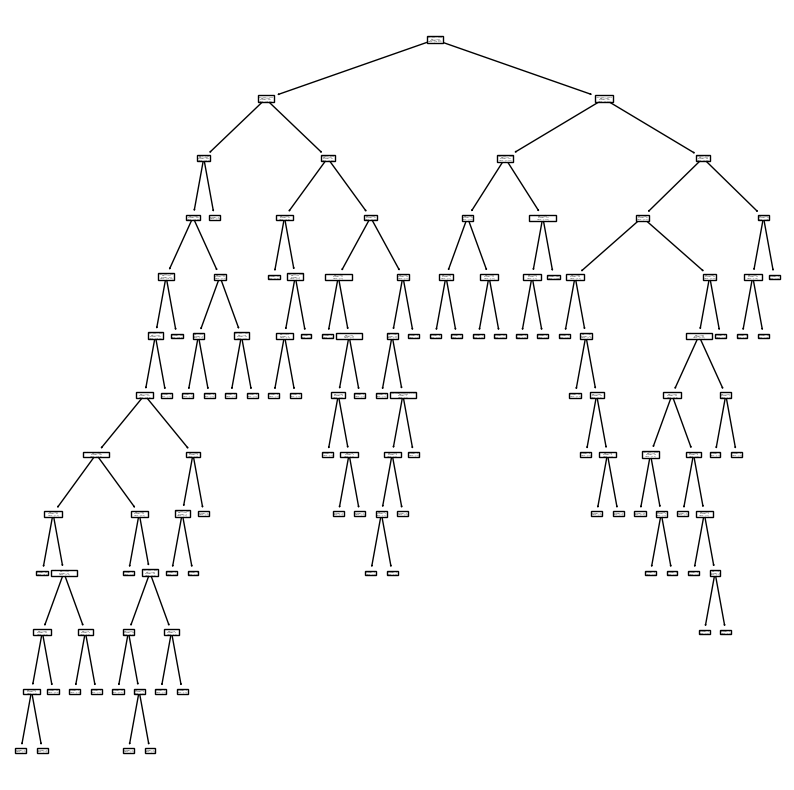

In [319]:
plt.figure(figsize=(10, 10))
tree = plot_tree(model, feature_names=feature_names) # 여전히 보기 힘들다

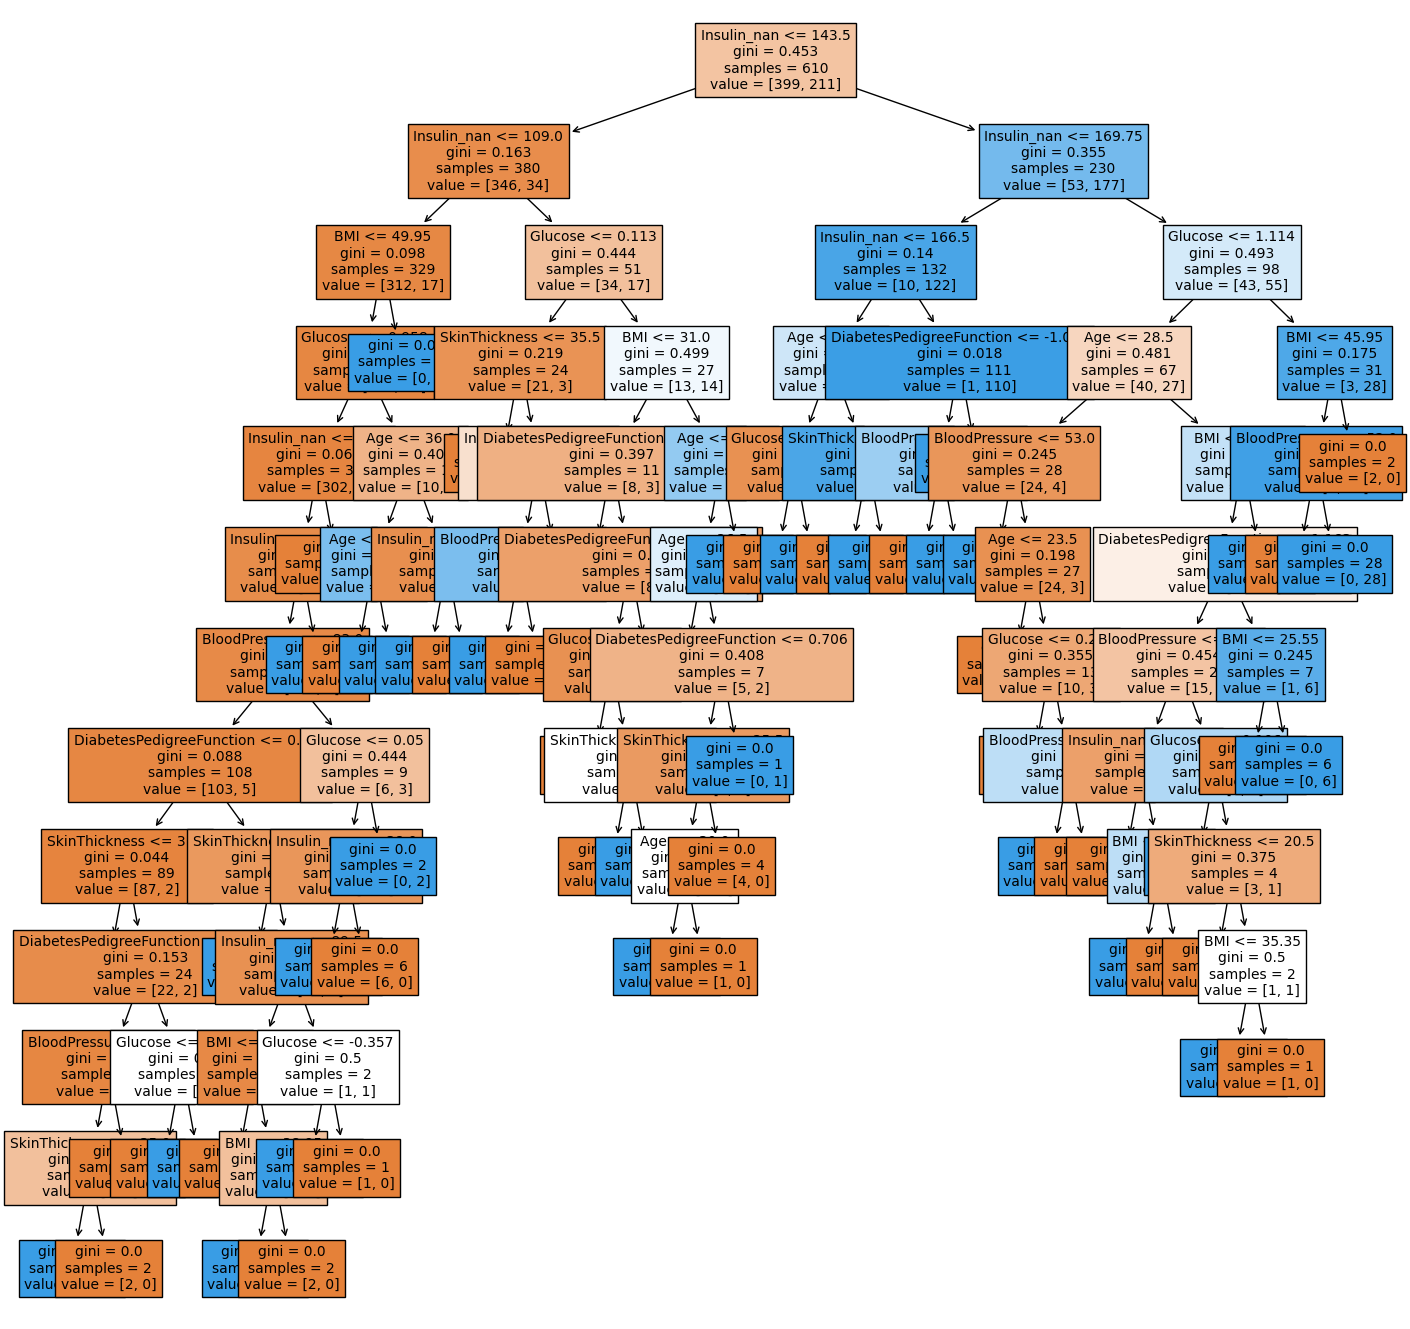

In [320]:
plt.figure(figsize=(17, 17))
tree = plot_tree(model,
                 feature_names=feature_names,
                 filled=True,
                 fontsize=10)

# Insulin의 결측치를 처리해줬더니, Insulin이 트리의 맨 위에 위치

In [321]:
# graphviz를 통해 시각화
# graphviz는 별도의 설치 필요

In [322]:
# 두 개 모두 설치해야 한다.
# 1) graphviz
# 2) graphviz를 사용할 수 있게 해주는 도구

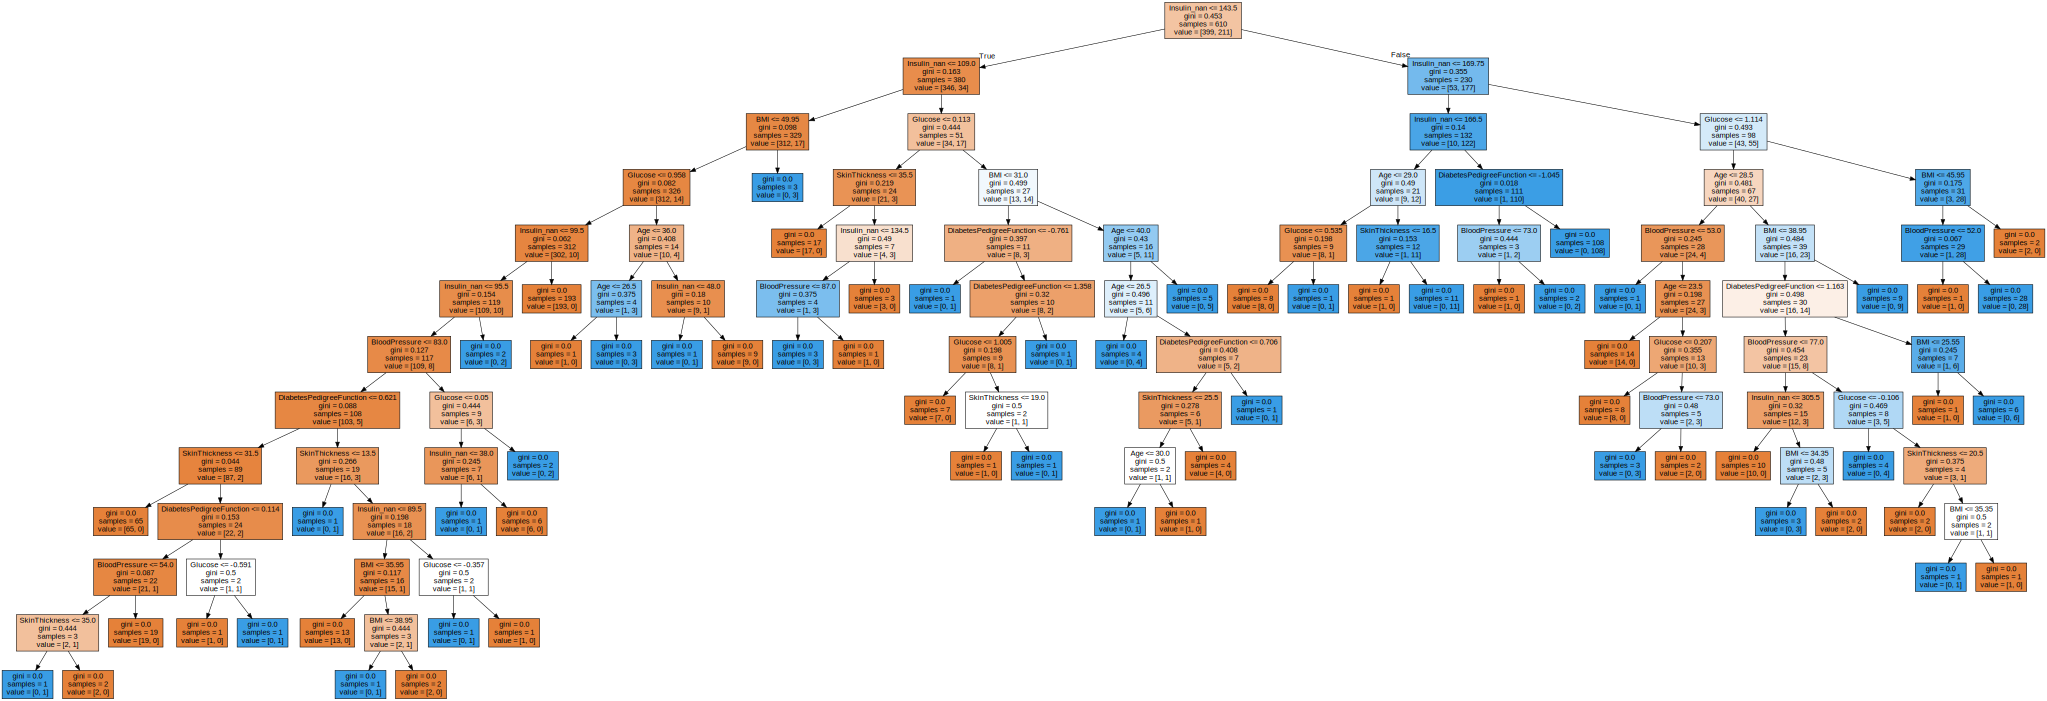

In [323]:
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model,
                           feature_names = feature_names,
                           filled=True)
graphviz.Source(dot_tree)

# 코랩에서 실행했기 때문에 설치 안 해도 됨

In [324]:
# 트리 아래로 갈수록 sample이 줄어들고, gini=0이 되면 당뇨병인지/아닌지 예측
# overfitting을 방지하기 위해 트리의 깊이를 정하기도 함 (pruning)

In [325]:
# 피처의 중요도를 추출
model.feature_importances_

array([0.09989248, 0.045349  , 0.03222584, 0.08008031, 0.03094277,
       0.08272508, 0.        , 0.62878452, 0.        ])

<ipython-input-326-4f6f64ae32c7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model.feature_importances_, y=feature_names, palette="tab10")


<Axes: >

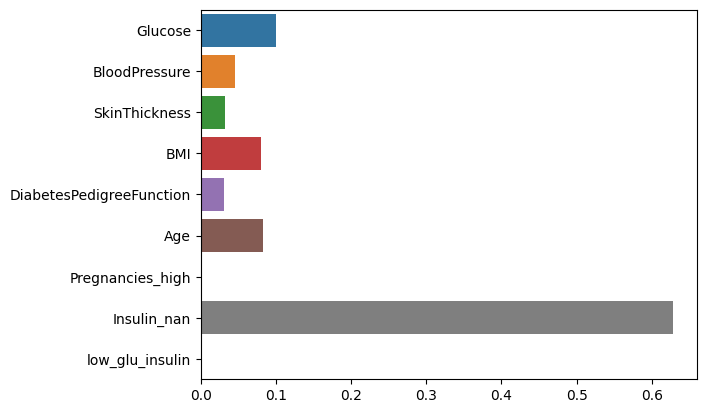

In [326]:
# 피처의 중요도 시각화하기
sns.barplot(x=model.feature_importances_, y=feature_names, palette="tab10")

# Age_low나 Age_high는 표본 수가 많지 않아서 그런지, 피처의 중요도가 낮다.

In [327]:
# Insulin이 중요한 피쳐일 것으로 생각했는데, 피쳐 중요도 시각화를 보니
# 그렇지 않은 것으로 나타났다.

# -> Insulin의 feature engineering 할 예정

### 11. 정확도(Accuracy) 측정하기

In [328]:
y_predict # 예측값

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

> 다르게 예측한 값

In [329]:
diff_count = abs(y_test - y_predict).sum() # 다르게 예측한 값의 개수
diff_count

15

In [330]:
diff_ratio = abs(y_test - y_predict).sum() / len(y_test) # 잘못 예측한 값의 비율
diff_ratio

0.09740259740259741

> 정확히 예측한 값

In [331]:
len(y_test) - diff_count # 맞춘 개수

139

In [332]:
((len(y_test)-diff_count) / len(y_test)) # 예측의 정확도

0.9025974025974026

In [333]:
# 1) 알고리즘을 이용하여 accuracy 구하기
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

# 피쳐 엔지니어링 전: 74 / Pregnancies 엔지니어링 후: 77 / Age 엔지니어링 후: 65
# => 피처 엔지니어링을 제대로 하지 않을 경우 정확도가 오히려 떨어질 수 있다.
# Age 엔지니어링 제거, Insulin 결측치 평균으로 대체: 83
# Age 엔지니어링 제거, Insulin 평균 중앙값으로 대체: 87
# Age 엔지니어링 제거, Insulin 평균 중앙값으로 대체한 후 로그변환: 88
# 위의 것 + 글루코스&인슐린 상관관계 파생변수 생성 후: 87
# 위의 것(Insulin은 로그변환 안 함) + 이상치 제거 후: 88
# 위의 것 + 피쳐 스케일링 후: 87 (데이터가 크지 않으므로 큰 차이가 없다)

0.9025974025974026

In [334]:
# 2) model의 score로 accuracy 계산 (정답 값을 알고 있을 때)
model.score(X_test, y_test)

0.9025974025974026

EDA를 통해 데이터를 정제하고, 어떤 피쳐를 사용할지 잘 결정하면 model의 정확도를 더 올릴 수 있다.